# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
sales = pd.read_csv(
    'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', 
    sep=';')

### Convert the SalesDate field to a datetime data type.

In [3]:
sales.SalesDate = pd.to_datetime(sales.SalesDate)
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


In [4]:
#sales.dtypes
#sales.SalesDate.dt.year.value_counts()
sales['Month']= sales.SalesDate.dt.strftime('%B')
sales['Week']= sales.SalesDate.dt.isocalendar().week
sales['Weekday']= sales.SalesDate.dt.strftime('%A')
sales['Day']= sales.SalesDate.dt.day
sales['Date']= sales.SalesDate.dt.date
sales['Hour']= sales.SalesDate.dt.hour
sales['Minute']= sales.SalesDate.dt.minute
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Month,Week,Weekday,Day,Date,Hour,Minute
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,February,6,Monday,5.0,2018-02-05,7.0,38.0
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,February,5,Friday,2.0,2018-02-02,16.0,3.0
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,May,18,Thursday,3.0,2018-05-03,19.0,31.0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,April,14,Saturday,7.0,2018-04-07,14.0,43.0
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,February,7,Monday,12.0,2018-02-12,15.0,37.0


### Create a line chart showing the number of total units sold per day in February.

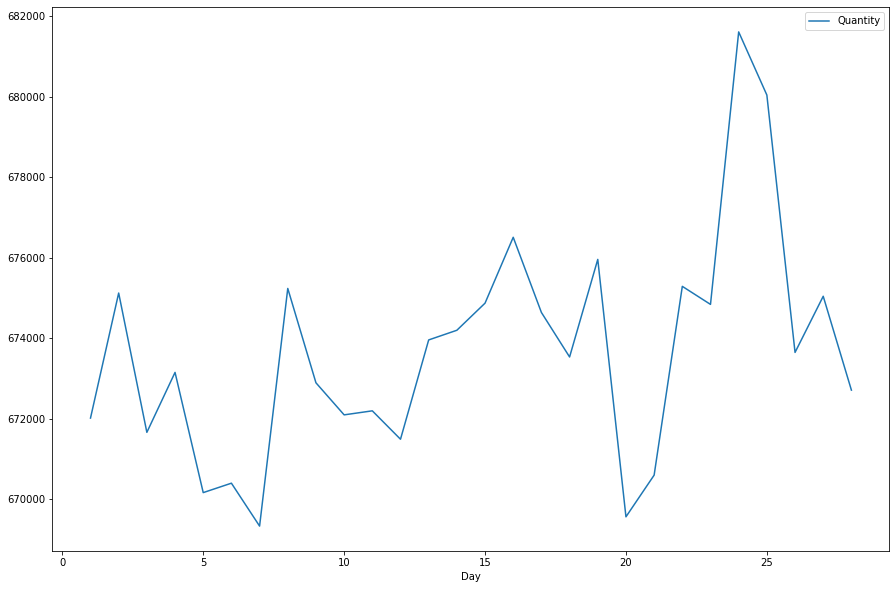

In [5]:
Feb = sales.loc[sales.Month == 'February'].sort_values(by='Day').groupby('Day').sum()
#display(Feb)
ax=Feb.plot(y='Quantity', kind='line', figsize=(15,10))

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

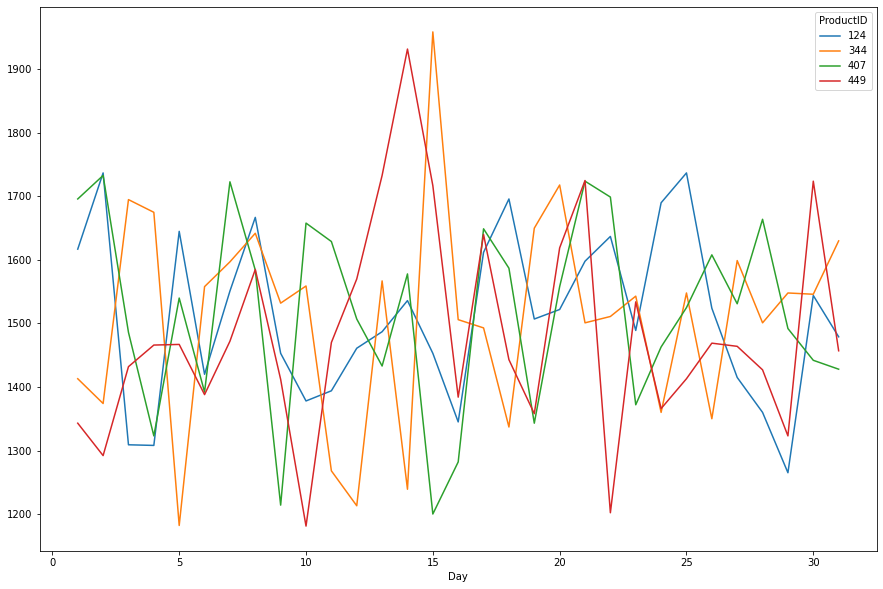

In [6]:
ids = [124, 344, 407, 449]
Mar = sales.loc[
    (sales.Month == 'March') & 
    (sales.ProductID.isin(ids))
].sort_values(by='Day')
Mar_pivot=Mar.pivot_table(index='Day', columns='ProductID', values='Quantity', aggfunc='sum')
ax=Mar_pivot.plot(kind='line', figsize=(15,10))

### Create a bar chart that shows units sold by each hour of the day.

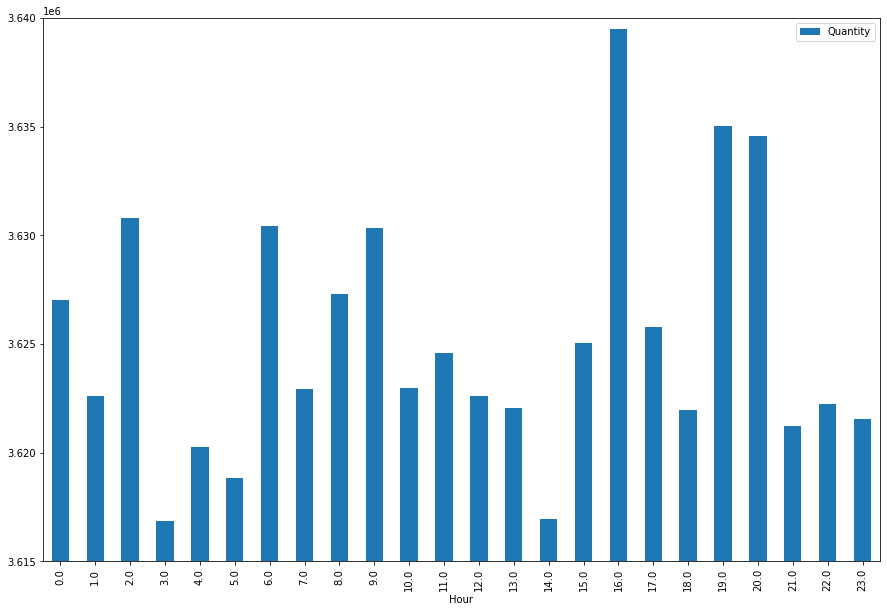

In [7]:
sales
units_per_hour =sales.pivot_table(index='Hour', values='Quantity', aggfunc='sum')
#display(units_per_hour)
ax=units_per_hour.plot(kind='bar', ylim=(3615000, 3640000), figsize=(15,10))

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

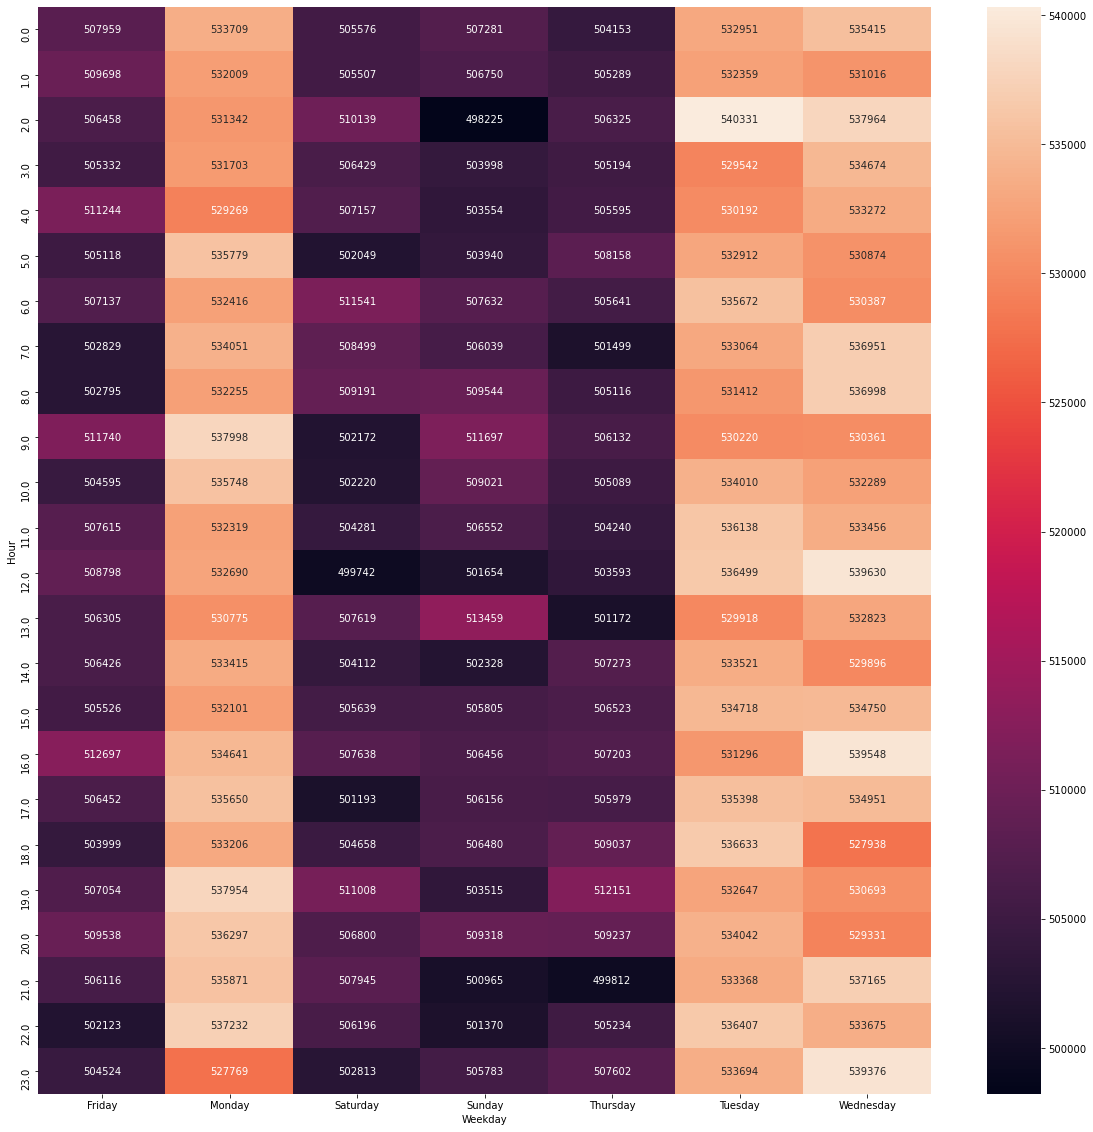

In [8]:
weekday_by_hour = sales.pivot_table(index='Hour', columns='Weekday', values='Quantity', aggfunc='sum')
plt.figure(figsize=(20,20))
figure=sns.heatmap(weekday_by_hour, annot=True,fmt='.7g')

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

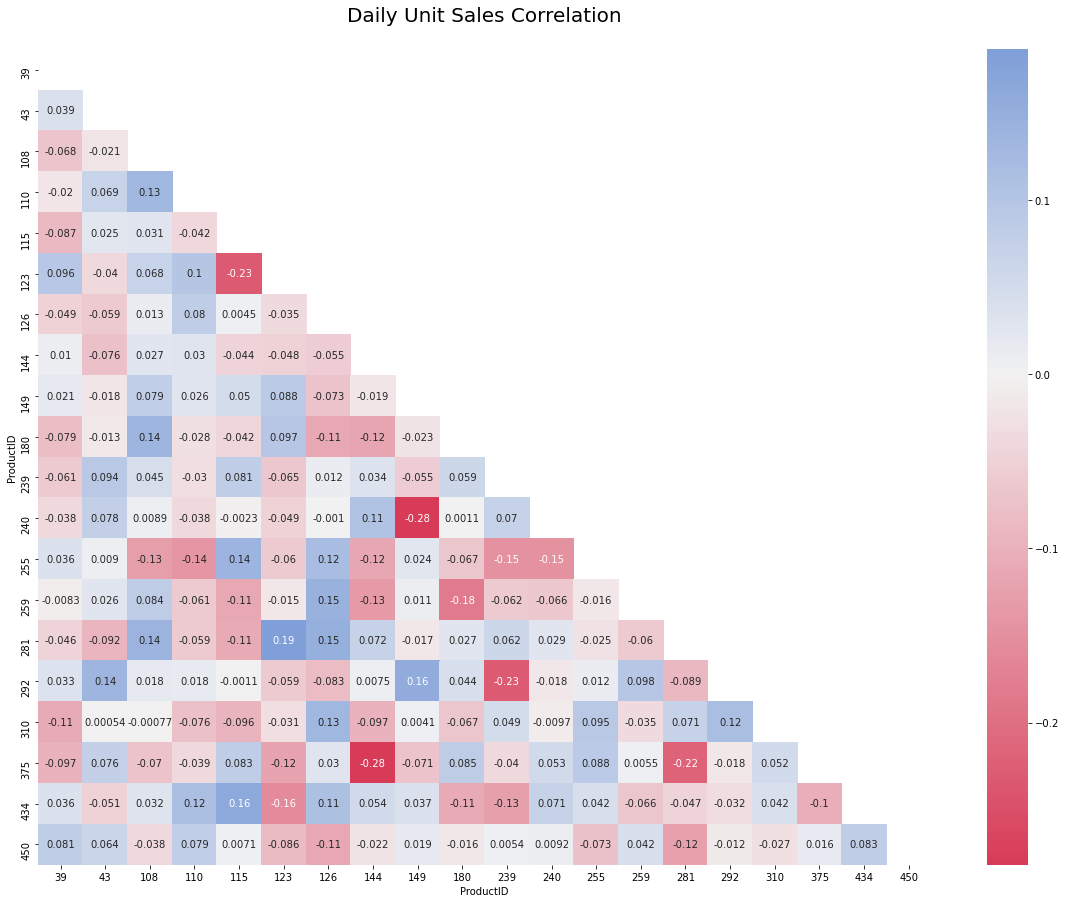

In [9]:
def correlation_plot(df, title=""):
    corr = df.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    plt.subplots(figsize=(20,15))
    cmap = sns.diverging_palette(6,255, as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, center=0)
    plt.title(title + "\n", fontsize=20)
    plt.show()
    
ids= pd.Series(sales.ProductID.unique()).sample(n=20, random_state=1).values
random_df = sales.loc[sales.ProductID.isin(ids)]
random_pivot = random_df.pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='sum')

correlation_plot(random_pivot, title='Daily Unit Sales Correlation')

### Create a histogram showing the distribution of daily units sold.

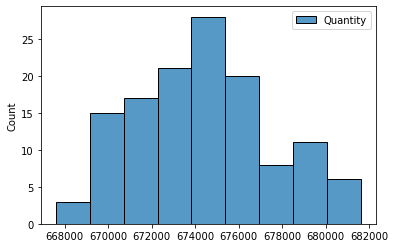

In [10]:
daily_units=sales.pivot_table(index='Date', values='Quantity', aggfunc='sum')
ax=sns.histplot(data=daily_units)

### Create a violin plot showing the distribution of daily units sold by month.

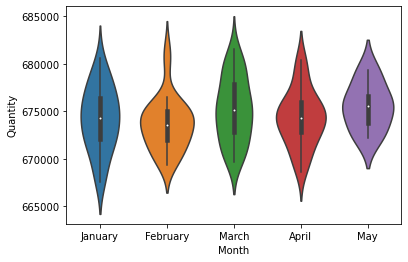

In [11]:
monthly_units=sales.groupby(['Date','Month'], as_index=False).sum()
#monthly_units
ax=sns.violinplot(data=monthly_units, x='Month', y='Quantity')